In [147]:
import gym
import numpy as np
import time
import random
import matplotlib.pyplot as plt
import gym_gridworld
import gymgrid
from IPython.display import clear_output # Used to clear the ouput of a Jupyter cell.

In [148]:
env = gym.make('Taxi-v3')
state = env.reset()
env.render()
print("State space:", env.observation_space)
print("Action space:", env.action_space)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

State space: Discrete(500)
Action space: Discrete(6)


In [149]:
new_state, reward, done, info = env.step(1) # Take action 1 (north)
env.render()
print("New state:", new_state)
print("Reward:", reward)
print("Done:", done)
print("Info:", info)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
New state: 373
Reward: -1
Done: False
Info: {'prob': 1.0}


# SARSA n-step

In [282]:
def train_sarsa(agent, env, n_episodes, max_steps=50000):
    step = 0
    steps = np.zeros(n_episodes) # Steps after each episode
    total_rewards = np.zeros(n_episodes)
    for i in range(n_episodes):
        episode_reward = 0
        t = 0
        T = float('inf')   
        
        state = env.reset()
        action = agent.act(state)
        states = [state]
        actions = [action]
        rewards = [0]     
        
        while True:
            
            if t < T:
                action = agent.act(state)
                state_next, reward, done, info = env.step(action)
                states.append(state_next)
                rewards.append(reward)
                
                if done:
                    T = t+1
                else:
                    action = agent.act(state_next)
                    actions.append(action)
                    
            tau = t-agent.n + 1 # tau is the timestamp of the Q-value being updated
            if tau >= 0:
                agent.learn(states, actions, rewards, tau, T)     
            
            state = state_next
            step += 1
            episode_reward += reward
            
            #if step>max_steps:
             #   return  episode_reward, steps
            
            if tau == T-1:
                break
                
            t +=1

        #print(episode_reward)
        steps[i] = step
        total_rewards[i] = episode_reward
    return total_rewards, steps

In [283]:
class SARSA():
    def __init__(self, n_states, n_actions, gamma, alpha, epsilon, n):
        self.n = n
        self.n_states = n_states
        self.n_actions = n_actions
        self.gamma = gamma
        self.alpha = alpha
        self.epsilon = epsilon
        self.Q = np.zeros((n_states, n_actions))
        
    def act(self, state):
        # epsilon-greedy policy       
        rand = random.uniform(0,1) # create random variable    
        # according to epsilon choose between following q-table or explore:    
        if rand > self.epsilon:
            action = np.argmax(self.Q[state,:]) #take action according to q-table - exploitation
        else:
            action = np.random.choice(self.n_actions)  #take random action - exploration
            
        return action
            
    def learn(self, states, actions, rewards, tau, T):
        G = 0
        for i in range(tau +1, min(tau + self.n +1 , T +1)):
            G += self.gamma**(i-tau-1) * rewards[i]
        if (tau + self.n) < T:
            G += self.gamma**self.n * self.Q[states[tau + self.n]][actions[tau + self.n]]
        
        #Update Q
        self.Q[states[tau], actions[tau]] += self.alpha * (G - self.Q[states[tau]][actions[tau]])

In [298]:
agent = SARSA(env.observation_space.n, env.action_space.n, gamma=1, alpha=0.1, epsilon=0.1, n=5)

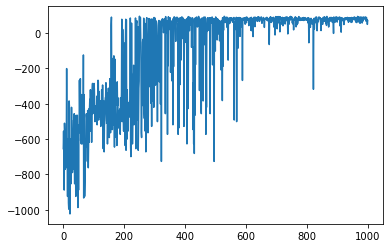

In [299]:
total_rewards, steps = train_sarsa(agent, env, n_episodes=1000)
plt.plot(total_rewards)
#print(total_rewards)

In [175]:
def test_policy(agent, env, wait=0.1, max_steps=40, render=True):
    state = env.reset()
    step = 0
    total_reward = 0
    done = False
    while not done and step<max_steps:
        action = agent.act(state)
        state, reward, done, info = env.step(action)
        total_reward += reward
        step += 1
        
        if render:
            clear_output(wait=True)
            env.render()
            # Show some information
            print("Time step:", step)
            print("Reward:", reward)
            print("Total reward:", total_reward)
            time.sleep(wait)
    env.close()
    return total_reward

In [15]:
agent.epsilon = 0
total_reward = test_policy(agent, env, max_steps=100)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Time step: 10
Reward: 20
Total reward: 11
